# Project: Investigating No Show Appointment Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#assessing">Assessing the data</a></li>
    <li><a href="#cleaning">Data cleaning</a></li>
    <li><a href="#descriptions">Column descriptions</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">What proportion of people do not show up to their appointments?</a></li>
        <li><a href="#q2">Are different genders more likely to show to their appointments?</a></li>
        <li><a href="#q3">Are different variables more likely to show to their appointments?</a></li>
        <li><a href="#q4">Are people more likely to show if they receive a text?</a></li>
        <li><a href="#q5">Are older people more likely to show up to their appointments?</a></li>
        <li><a href="#q6">What is the average difference between scheduled and appointment day? How does this affect appointment attendance?</a></li></ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Selecting database**: 
>
>I have selected the no-show appointments database for this assignment. 

>**Importing package**
>
>I have imported the pandas, numpy and seaborn packages.  I have imported matplotlib and
I have used the %matplotlib magic function to see graphs inline.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


>**I plan on asking the following questions:**
- What proportion of people do not show up to their appointments?
- Are different genders more likely to show to their appointments?
- Are different variables more likely to show to their appointments?
- Are people more likely to show if they receive a text?
- Are older people more likely to show up to their appointments?
- What is the average difference between scheduled and appointment day? How does this affect appointment attendance?

<a id='wrangling'></a>
## Data Wrangling


> **Loading my data:**
>
>I loaded my data here using the pandas.read_csv( ). 
>
> I then examine the data using the pandas.head( ) to see what I am working with.

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Things I would like to change:**
>
> - Right off the bat I can see that the headings could be in a better format.
> - PatientId column should be in integer format so that it doesn't show it as a scientific notation.
> - ScheduledDay and AppointmentDay Columns should be in a better date format.

<a id='assessing'></a>
### Assessing the data

My dataset has 110527 rows and 14 columns.

In [3]:
df.shape

(110527, 14)

My dataset has no null values. Eight columns are integers. Five are objects/strings and one is a float.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This code verifies my initial belief of there being no null values.

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

I have no duplicated rows in my dataset either.

In [6]:
sum(df.duplicated())

0

The 'Handcap' column seems to have 5 unique values and I am unsure why it is not a dummy variable. Further analysis shows it takes on the values 0,1,2,3 and 4.

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

Finally, this code allows me to see an overview of my dataset. I have rounded the numbers to 3 decimal places to make it easier to read.

The average patient is 37 years old and probably does not have any medical conditions such as hypertension, diabetes, alcoholism and is not handicapped. And there is around a 1 in 3 chance they received a text.

There is a -1 year old, which is impossible, so I will remove this row.

In [9]:
df.describe().round(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000
mean,1.474963e+14,5675305.123,37.089,0.098,0.197,0.072,0.030,0.022,0.321
std,2.560949e+14,71295.752,23.110,0.298,0.398,0.258,0.172,0.162,0.467
min,3.921784e+04,5030230.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.172614e+12,5640285.500,18.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.173184e+13,5680573.000,37.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.439172e+13,5725523.500,55.000,0.000,0.000,0.000,0.000,0.000,1.000
max,9.999816e+14,5790484.000,115.000,1.000,1.000,1.000,1.000,4.000,1.000


<a id = 'cleaning'></a>
### Data Cleaning

> **I previously stated that I would like to change:**
>
> - PatientId column should be in integer format so that it doesn't show it as a scientific notation.
> - ScheduledDay and AppointmentDay Columns should be in a better date format.
> - Headings into a better format.

>**After some more thought, I would also like to:**
>
>- Drop -1 year old age patient
- Drop Handcap as it has 5 unique values. 
- Change no-show to a dummy variable.
- Calculate the difference between ScheduledDay and AppointmentDay.

Here, I am checking the PatientId columns' datatype. Then I change into an integer and verify the column has changed.

In [10]:
type(df['PatientId'][0])

numpy.float64

In [11]:
df['PatientId'] = df.PatientId.astype(np.int64)
type(df['PatientId'][0])

numpy.int64

This code changes my 'Scheduled Day' column from an object/string to a datetime function.

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

This code changes my 'Appointment Day' column from an object/string to a datetime function.

In [13]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

Next, I changed the column headings into snake case where necessary. I have also shortened most of the variable names to make it more efficient when typing.

In [14]:
df.columns=['pat_id',
            'app_id',
            'gender',
            'sch_day',
            'app_day',
            'age',
            'area',
            'aid',
            'hyper',
            'diab',
            'alco',
            'hand',
            'sms',
            'no_show']

I then dropped the row with the -1 year old patient.

In [15]:
df.drop(df.query('age < 0').index, inplace=True)

I then drop the Handcap column.

In [16]:
df.drop(['hand'], axis=1, inplace=True)

The next step is changing the 'Yes' values in the 'no_show' column to 1 and 'No' values to 0.

In [17]:
df['no_show'] = df.no_show.map(dict(Yes=1, No=0))

The final step in cleaning the data is calculating the difference between AppointmentDay and ScheduledDay. Then coverting this timedelta into integers. Then, I delete any rows where the day difference is less than zero.

In [18]:
df['day_diff'] = df['app_day']-df['sch_day']
df['day_diff'] = df['day_diff'].dt.days

In [19]:
df.drop(df.query('day_diff < 0').index, inplace=True)

Finally, I view my dataset again to make sure all changes have been made.

In [20]:
df.head()

,pat_id,app_id,gender,sch_day,app_day,age,area,aid,hyper,diab,alco,sms,no_show,day_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='descriptions'></a>
### Column descriptions

| Column names | Definitions |
| --- | :--- |
| pat_id | The patient's id number |
|app_id | The appointment id|
|gender | Phe patient's gender|
|sch_day | The date the appointment was made|
|app_day | The date of the appointment|
|age | The patient's age|
|area | The patient's neighbourhood|
|aid| If the patient is enrolled in Brasilian welfare program Bolsa Família the number is 1, otherwise 0|
|hyper | If the patient has hypertension the number is 1, otherwise 0|
|diab |If the patient has diabetes the number is 1, otherwise 0|
|alco |If the patient is an alcoholic the number is 1, otherwise 0|
|sms |If the patient received an sms before their appointment the number is 1, otherwise 0|
|no_show |If the patient did not show to their appointment the number is 1, otherwise 0|
|diff_day|The difference between AppointmentDay and ScheduledDay|

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I have wrangled my data. The next step is exploring it. I will answer my research questions by computing statistics and creating visualizations in this section. 

>**I plan on asking the following questions:**
- What proportion of people do not show up to their appointments?
- Are different genders more likely to show to their appointments?
- Are different variables more likely to show to their appointments?
- Are people more likely to show if they receive a text?
- What is the average difference between scheduled and appointment day? How does this affect appointment attendance?

>My dependent variable is no_show. While every other columns are my independent variables.


### Research Questions

<a id = 'q1'></a>
**What proportion of people do not show up to their appointments?**

Broken down, a total of 88,207 patients showed up to their appointments and 22,314 did not.

In [21]:
df['no_show'].value_counts()

0    88207
1    22314
Name: no_show, dtype: int64

This is a histogram showing the patient breakdown of those who did and did not go to their appointments.

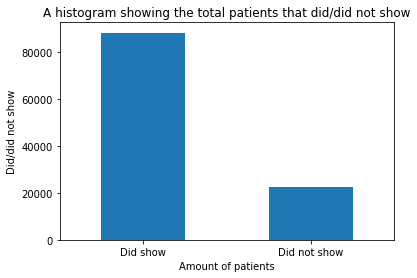

In [22]:
df['no_show'].value_counts().plot(kind='bar')
plt.title('A histogram showing the total patients that did/did not show')
plt.xlabel('Amount of patients')
plt.ylabel('Did/did not show')
plt.xticks([0, 1], ['Did show', 'Did not show'], rotation='horizontal');

In [23]:
"The proportion of patients that did not show up to their appointment was {}".format(round(df['no_show'].mean(),3))

'The proportion of patients that did not show up to their appointment was 0.202'

<a id = 'q2'></a>
**Are different genders more likely to show to their appointments?**

I am creating a mask for rows where patients showed and did not show.

In [24]:
showed = df['no_show'] == 0
noshowed = df['no_show'] == 1

I have created a histogram to show the gender of those who showed and did not show. At first glance it may look like females both showed and did not show more than males. However, if males were scaled up, there is not much difference.

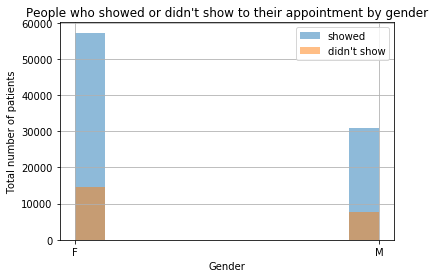

In [25]:
df.gender[showed].hist(alpha = 0.5, label = 'showed')
df.gender[noshowed].hist(alpha = 0.5, label = 'didn\'t show')
plt.legend();
plt.title('People who showed or didn\'t show to their appointment by gender')
plt.xlabel('Gender')
plt.ylabel('Total number of patients');

I am creating proportions for genders who showed and did not show.
<br>ga1 is the proportion of females who showed.
<br>ga2 is the proportion of females who did not show.
<br>ga3 is the proportion of males who showed.
<br>ga4 is the proportion of males who did not show.

In [26]:
ga1 = df.gender[showed].value_counts().F/df.gender.value_counts().F
ga2 = df.gender[noshowed].value_counts().F/df.gender.value_counts().F
ga3 = df.gender[showed].value_counts().M/df.gender.value_counts().M
ga4 = df.gender[noshowed].value_counts().M/df.gender.value_counts().M

As I thought, the difference between males and females is minimal. Meaning there is no relationship between gender and those who do and do not show.

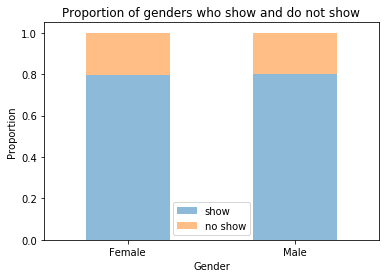

In [27]:
genapp = pd.DataFrame([[ga1,ga2],[ga3,ga4]], columns=['show', 'no show'])
genapp.plot.bar(stacked=True, alpha=.5)
plt.title("Proportion of genders who show and do not show")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Female', 'Male'], rotation='horizontal');

<a id = 'q3'></a>
**Are different variables more likely to show/not show to their appointments?**

On average, older people tend to keep their appointments more. There is a 3 year age difference between showed and noshowed.

In [28]:
df.age[showed].mean(), df.age[noshowed].mean()

(37.790504154999034, 34.31787218786412)

The difference is so small that it is not that noticeable but on average, patients with a scholarship are more likely to not show than show.

In [29]:
df.aid[showed].mean(), df.aid[noshowed].mean()

(0.09390411191855522, 0.11553284933225777)

The difference here again, is not that big but on average, hypertension patients tend to show up to their appointments more than not show up.

In [30]:
df.hyper[showed].mean(), df.hyper[noshowed].mean()

(0.20439420907637715, 0.16904185713005287)

On average, diabetic patients tend to keep their appointments more. Again, there is the difference is really small here, so it is a bit of a leap to draw such conclusions.

In [31]:
df.diab[showed].mean(), df.diab[showed].mean()

(0.07383767728184838, 0.07383767728184838)

Lastly, alcholics tend to show/not show up at around the same rate. This variable has the smallest difference.

In [32]:
df.alco[showed].mean(), df.alco[noshowed].mean()

(0.03041708707925675, 0.030339697051178633)

This scatter plot shows that most patients miss up to 3 appointments. The maximum missed appointment was 18.

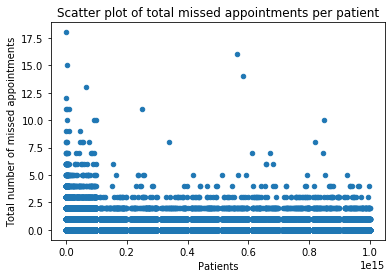

In [33]:
totalmissed = df.groupby('pat_id').agg({'no_show': ['sum']}).reset_index()
totalamount = df.groupby('pat_id').agg({'no_show': ['count']}).reset_index()
totalmissed.plot(x='pat_id', y='no_show', kind='scatter')
plt.title('Scatter plot of total missed appointments per patient')
plt.xlabel('Patients')
plt.ylabel('Total number of missed appointments');

<a id = 'q4'></a>
**Are people more likely to show if they receive a text?**

The result below suggests that of the people who showed up to their appointments 29.1% of them received a text and of the people who didn't show 43.8% received a text.

In [34]:
df[showed].sms.mean(), df[noshowed].sms.mean()

(0.29133742220005215, 0.43846912252397596)

I am creating a mask for rows where patients where texted and where not texted.

In [35]:
smsed = df['sms'] == 1
nosmsed = df['sms'] == 0

The result below suggests that of the people who were texted, 27.6% decided not to go. While 16.7% of those not texted decided not to go. This could mean the texts may not be helping and that it may be more useful to not be texted, if the clinic wants people to show up. However, it may just be a coincidence.

In [36]:
df[smsed].no_show.mean(), df[nosmsed].no_show.mean()

(0.27574544839637, 0.16697983715134795)

I am querying for people who were/were not texted and who showed/did not show.

With further investigation, I can see that from the total dataset more than half the patients did not get a text but still showed up. Then around 23% of patients got a text and showed. 11% of patients did not get a text, leading to them not showing up and only 8.85% of patients got a text and decided not to show still. This falls more in line with predictions.

In [37]:
smsshow = df[['sms','no_show']].query('sms==1 & no_show==0').count().sms
smsnoshow = df[['sms','no_show']].query('sms==1 & no_show==1').count().sms
nosmsnoshow =df[['sms','no_show']].query('sms==0 & no_show==1').count().sms
nosmsshow = df[['sms','no_show']].query('sms==0 & no_show==0').count().sms
total = df['sms'].count()

In [38]:
a1 = 'Got a text and showed - {}%'.format((smsshow/total*100).round(1))
a2 = 'Got a text and didnt show - {}%'.format((smsnoshow/total*100).round(2))
a3 = 'Did not get a text, did not show - {}%'.format((nosmsnoshow/total*100).round(1))
a4 = 'Did not get a text and showed - {}%'.format((nosmsshow/total*100).round(1))
a1,a2,a3,a4

('Got a text and showed - 23.3%',
 'Got a text and didnt show - 8.85%',
 'Did not get a text, did not show - 11.3%',
 'Did not get a text and showed - 56.6%')

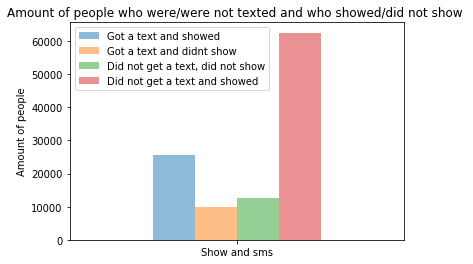

In [39]:
smsshow_df = pd.DataFrame([[smsshow, smsnoshow, nosmsnoshow, nosmsshow]], columns=['Got a text and showed','Got a text and didnt show','Did not get a text, did not show','Did not get a text and showed'])

smsshow_df.plot(kind='bar', alpha=0.5, align='center')
plt.xticks([0], ['Show and sms'], rotation='horizontal')
plt.title('Amount of people who were/were not texted and who showed/did not show ')
plt.ylabel('Amount of people');


<a id = 'q5'></a>
**Are older people more likely to show up to their appointments?**

In [40]:
group1 = df.query('0 < age < 30')
group2 = df.query('31 < age < 60')
group3 = df.query('61 < age < 90')
group4 = df.query('91 < age < 120')

In [41]:
a = "The proportion of unders 30s that did not show up was {}".format(round(group1.no_show.mean(),3))
b = "The proportion of 31 to 60 year olds that did not show up was {}".format(round(group2.no_show.mean(),3))
c = "The proportion of 61 to 90 year olds that did not show up was {}".format(round(group3.no_show.mean(),3))
d = "The proportion of 91 to 120 year olds that did not show up was {}".format(round(group4.no_show.mean(),3))

In [42]:
a, b, c, d

('The proportion of unders 30s that did not show up was 0.234',
 'The proportion of 31 to 60 year olds that did not show up was 0.195',
 'The proportion of 61 to 90 year olds that did not show up was 0.151',
 'The proportion of 91 to 120 year olds that did not show up was 0.202')

It seems the youngest, under 30s, are worst at keeping their appointments, with 23.4% not showing up. And the 61 to 90 year olds are the best with only 15% forgetting their appointments. 

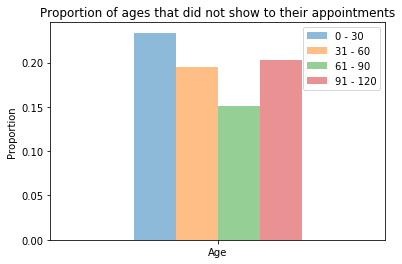

In [43]:
age = pd.DataFrame([[group1.no_show.mean(), group2.no_show.mean(), group3.no_show.mean(), group4.no_show.mean()]], columns=['0 - 30','31 - 60','61 - 90','91 - 120'])

age.plot(kind='bar', alpha=0.5, align='center')
plt.xticks([0], ['Age'], rotation='horizontal')
plt.title('Proportion of ages that did not show to their appointments')
plt.ylabel('Proportion');


This is a distribution for the ages who did and did not show.

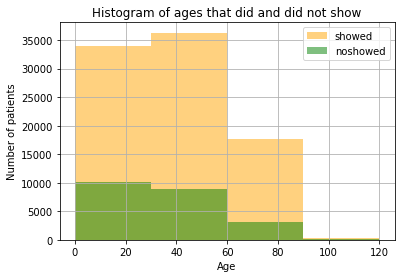

In [44]:
binedges = [0, 30, 60, 90, 120]
df.age[showed].hist(alpha=0.5, bins=binedges, color='orange', label='showed')
df.age[noshowed].hist(alpha=0.5, bins=binedges, color='green', label='noshowed')
plt.title('Histogram of ages that did and did not show')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend();

<a id = 'q6'></a>
**What is the average difference between scheduled and appointment day and how does it affect attendance of appointments?**

Patients take 10 days on average between booking and attending the appointment.

In [45]:
day_diff_mean = df['day_diff'].mean()
day_diff_mean

10.184345056595578

Here, I am splitting up the day_diff column with the mean. There are those more than or equal to the mean and those less than the mean. 

In [46]:
morethan10 = df.query('day_diff >= {}'.format(day_diff_mean))
lessthan10 = df.query('day_diff < {}'.format(day_diff_mean))

Of the patients that give 10 or more days notice, 60.4% of them received a text and 32.5% of them did not go to their appointment.

In [47]:
morethan10.sms.mean(), morethan10.no_show.mean()

(0.6038146664344191, 0.3251466062822969)

Of the patients that give less than 10 days notice, 19.3% of them received a text and 14.6% of them did not go to their appointment.

In [48]:
lessthan10.sms.mean(), lessthan10.no_show.mean()

(0.19300690108445612, 0.14609267170555373)

This shows that there is a correlation between day difference and sms columns, but the correlation is very weak.

In [49]:
df['day_diff'].corr(df['sms'])

0.3981282984768228

From left to right, the bar graph below shows:
- The percentage of patients that received an sms, who gave a longer appointment notice period than average.
- The percentage of patients that received a text, who gave a shorter appointment notice period than average.
- The percentage of patients that did not show and gave a longer appointment notice period than average.
- The percentage of patients that did not show and gave a shorter appointment notice period than average.

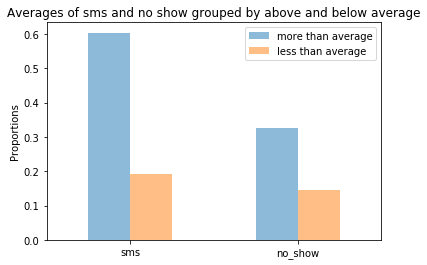

In [50]:
mta = [morethan10.sms.mean(),morethan10.no_show.mean()]
lta = [lessthan10.sms.mean(), lessthan10.no_show.mean()]
index = ['sms', 'no_show']
bar1 = pd.DataFrame({'more than average': mta,
                   'less than average': lta}, index=index)
ax = bar1.plot.bar(rot=0, alpha=0.5)
plt.title('Averages of sms and no show grouped by above and below average')
plt.ylabel('Proportions');

I count the amount of appointments grouped by day_diff column. Then I count the amount of missed appointments grouped by day_diff column. Then I find the percentage of missed appointments for for the given day.

In [51]:
day_diff_count = df.groupby('day_diff')['no_show'].count()
day_diff_sum = df.groupby('day_diff')['no_show'].sum()
day_diff_countsum = day_diff_sum/day_diff_count

I then create a line graph, with a rolling mean of 5 days to smooth it out. Between 80 to 125 days it is a bit erratic, but the proportion of people who do not show generally decreases, meaning more people are showing up to their apppointments. The amount of people not showing is at its lowest at 125 days. This then increases sharply from 125 to 155 days and drops again after that.

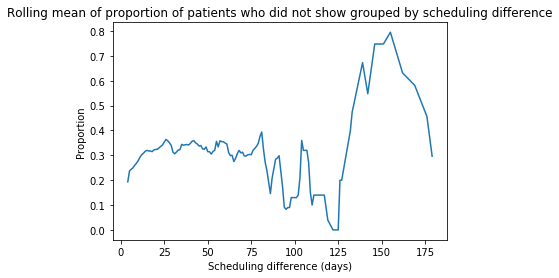

In [52]:
plt.plot(day_diff_countsum.rolling(5).mean())
plt.title('Rolling mean of proportion of patients who did not show grouped by scheduling difference')
plt.xlabel('Scheduling difference (days)')
plt.ylabel('Proportion');

The histogram shows that most appointments are made a maximum of 8 days in advance.

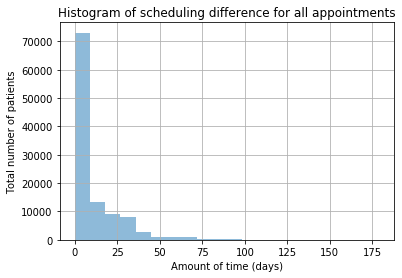

In [53]:
df['day_diff'].hist(bins=20, alpha=.5)
plt.title('Histogram of scheduling difference for all appointments')
plt.xlabel('Amount of time (days)')
plt.ylabel('Total number of patients');

34.9% of appointments are booked and scheduled on the same day.

In [54]:
df.query('day_diff == 0').count().day_diff/df.count().day_diff

0.3489110666751115

<a id='conclusions'></a>
## Conclusions

<ul>
    <li><b>What proportion of people do not show up to their appointments?</b></li>
    <ul><li>There are 88,207 patients who turned up to their appointment and 22,314 who did not. This equated to 20.2% of the total dataset who did not turn up to their appointment.</li></ul>
    <li><b>Are different genders more likely to show to their appointments?</b></li>
    <ul><li>Gender has no effect on patients showing up to their appointment.</li></ul>
    <li><b>Are different variables more likely to show to their appointments?</b></li>
    <ul><li>On average, older people tend to keep their appointments more. There is a 3 year age difference between showed and noshowed.</li></ul>
    <ul><li>Other than that, none of the other variables (scholarship, hypertension, diabetes, alcoholism) showed a relationship with not showing up. </li></ul>
    <ul><li>Most patients miss up to 3 appointments. The maximum missed appointment was 18.</li></ul>
    <li><b>Are people more likely to show if they receive a text?</b></li>
    <ul><li>Of the people who showed up to their appointments 29.1% of them received a text and of the people who didn't show 43.8% received a text.</li></ul>
    <ul><li>Of the people who were texted, 27.6% decided not to go. While 16.7% of those not texted decided not to go. This could mean the texts may not be helping and that it may be more useful to not be texted, if the clinic wants people to show up. However, it may just be a coincidence.</li></ul>
    <ul><li>More than half the patients did not get a text but still showed up. Then around 23% of patients got a text and showed. 11% of patients did not get a text, leading to them not showing up and only 8.85% of patients got a text and decided not to show still.</li></ul>
    <li><b>Are older people more likely to show up to their appointments?</b></li>
    <ul><li>It seems the youngest, under 30s, are worst at keeping their appointments, with 23.4% not showing up. And the 61 to 90 year olds are the best with only 15% forgetting their appointments. </li></ul>
    <li><b>What is the average difference between scheduled and appointment day? How does this affect appointment attendance?</b></li>
    <ul><li>Patients take 10 days on average between booking and attending the appointment.</li></ul>
    <ul><li>Of the patients that give 10 or more days notice, 60.4% of them received a text and 32.5% of them did not go to their appointment.</li></ul>
    <ul><li>Of the patients that give less than 10 days notice, 19.3% of them received a text and 14.6% of them did not go to their appointment.</li></ul>
    <ul><li>There is a correlation between day difference and sms columns, but the correlation is very weak.</li></ul>
    <ul><li>Between 80 to 125 days it is a bit erratic, but the proportion of people who do not show generally decreases, meaning more people are showing up to their apppointments. The amount of people not showing is at its lowest at 125 days. This then increases sharply from 125 to 155 days and drops again after that.</li></ul>
    <ul><li>Most appointments are made a maximum of 8 days in advance.</li></ul>
    <ul><li>34.9% of appointments are booked and scheduled on the same day.</li></ul>
</ul>